In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pysam
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from collections import Counter

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
# !ls -a '/data/parastou/Star-Lab/test/10samples'

In [6]:
samples = ['AAACAT', 'AGGCGG', 'CACCGG', 'CATCAG', 'CGCCTC', 'GAAGAC', 'GCCTGC', 'GGACAT', 'TATCAT', 'TGTATT']

In [7]:
path = '/data/parastou/Star-Lab/test/10samples'

----------------

In [8]:
in_file1 = '/data/parastou/Star-Lab/test/10samples/HGsample_AAACAT.mq.cmap.pkl'
in_file2 = '/data/parastou/Star-Lab/test/10samples/HGsample_AAACAT.mq.umi_gmap.pkl'

In [9]:
cmap = pickle.load(open(in_file1, 'rb'))
gmap = pickle.load(open(in_file2, 'rb'))

In [10]:
single_read_umis = []
for k, v in gmap.items():
    if len(v) == 1:
        single_read_umis.append(k)

In [11]:
cmap_single = {}
cmap2 = {}

for k, v in cmap.items():
    
    xm = k.split(':')[0]
    if xm in single_read_umis:
        cmap_single.update({k:v})
    else:
        cmap2.update({k:v})

In [14]:
all_ones = []
rest = []

for k, v in cmap2.items():
    
    xm = k.split(':')[0]
    nhs = set([n for i,j,n,z,w in v])
    if nhs == set([1]):
        all_ones.append(xm)
    else:
        rest.append(xm)
        
all_ones = list(set(all_ones))
rest = list(set(rest))

all_uniques_umis = [item for item in all_ones if item not in rest]

In [15]:
cmap_all_uniques = {}
cmap3 = {}

for k, v in cmap2.items():
    
    xm = k.split(':')[0]
    if xm in all_uniques_umis:
        cmap_all_uniques.update({k:v})
    else:
        cmap3.update({k:v})

In [16]:
case2_umis = []

for k, v in cmap3.items():
    reads = [i for i,j,n,z,w in v]
    if len(reads) > len(set(reads)):
        case2_umis.append(k.split(':')[0])

case2_umis = list(set(case2_umis))

In [17]:
case2_map = {}
cmap4 = {}

for k, v in cmap3.items():
    if k.split(':')[0] in case2_umis:
        case2_map.update({k:v})
    else:
        cmap4.update({k:v})

In [18]:
emc_umis = []

for k, v in cmap4.items():
    
    xm = k.split(':')[0]
    reads = [i for i,j,n,z,w in v]
    if set(reads) == set(gmap[xm]):
        emc_umis.append(xm)
        
emc_umis = list(set(emc_umis))

In [19]:
emc_map = {}
cmap5 = {}

for k, v in cmap4.items():
    
    xm = k.split(':')[0]
    if xm in emc_umis:
        emc_map.update({k:v})
    else:
        cmap5.update({k:v})

In [20]:
emc_count = {}

for k, v in emc_map.items():
    
    xm = k.split(':')[0]
    if xm in emc_count:
        emc_count[xm] += 1
    else:
        emc_count.update({xm:1})

In [21]:
uemc_names = [k for k in emc_count if emc_count[k] == 1]

uemc_map = {}
memc_map = {}

for k, v in emc_map.items():
    xm = k.split(':')[0]
    if xm in uemc_names:
        uemc_map.update({k:v})
    else:
        memc_map.update({k:v})

In [22]:
max_mc_size = {}

for k, v in cmap5.items():
    xm = k.split(':')[0]
    if xm in max_mc_size:
        if max_mc_size[xm] < len(v):
            max_mc_size[xm] = len(v)
    else:
        max_mc_size.update({xm:len(v)})

In [23]:
import numpy as np
import matplotlib.pyplot as plt

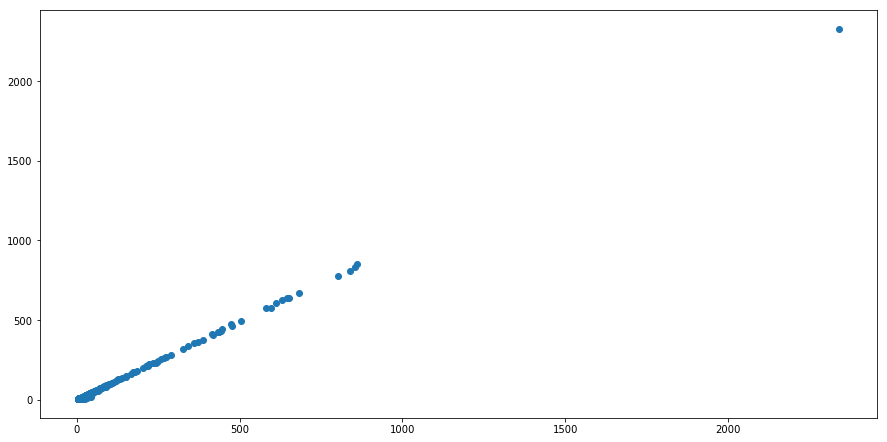

In [24]:
X = []
Y = []

for k, v in max_mc_size.items():
    
    X.append(len(gmap[k]))
    Y.append([v])

x = np.array(X)
y= np.array(Y)

line = plt.figure(figsize=(15,7.5))
plt.plot(x, y, "o")
plt.show()

In [25]:
print 'Total number of clusters:\t%s' % format(len(cmap), ',')
print 'Clusters with single reads:\t%s' % format(len(cmap_single), ',')
print 'Clusters with all unique reads:\t%s' % format(len(cmap_all_uniques), ',')
print 'Case2 clusters :\t\t%s' % format(len(case2_map), ',')
print 'Clusters with at least one emc:\t%s' % format(len(emc_map), ',')
print 'Total number of unique emcs:\t%s' % format(len(uemc_map), ',')
print 'Including at least one mc:\t%s' % format(len(cmap5), ',')

Total number of clusters:	401,308
Clusters with single reads:	6,490
Clusters with all unique reads:	521
Case2 clusters :		380,972
Clusters with at least one emc:	8,843
Total number of unique emcs:	350
Including at least one mc:	4,482


In [26]:
len(cmap_single) + len(cmap_all_uniques) + len(case2_map) + len(emc_map) + len(cmap5)

401308

------------------------------

In [37]:
case2_report = {}

for k, v in case2_map.items():
    
    names = [i for i, _, _ , _ , _  in v]
    dup_names = [n for n, val in Counter(names).items() if val > 1]
    if dup_names:
        case2_report.update({k: v})

In [57]:
df = pd.DataFrame(case2_report['TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556'])

In [59]:
df.sort_values(0)

,0,1,2,3,4
1,L183:338:CAGAAANXX:4:1110:7233:14997,1924502,1454,1.0,50M
21,L183:338:CAGAAANXX:4:1110:7233:14997,1924506,1454,1.0,50M
6,L183:338:CAGAAANXX:4:1110:7233:14997,1924503,1454,1.0,50M
16,L183:338:CAGAAANXX:4:1110:7233:14997,1924505,1454,1.0,50M
11,L183:338:CAGAAANXX:4:1110:7233:14997,1924504,1454,1.0,50M
12,L183:338:CAGAAANXX:4:1113:4786:16495,1924504,1454,1.0,50M
2,L183:338:CAGAAANXX:4:1113:4786:16495,1924502,1454,1.0,50M
22,L183:338:CAGAAANXX:4:1113:4786:16495,1924506,1454,1.0,50M
7,L183:338:CAGAAANXX:4:1113:4786:16495,1924503,1454,1.0,50M
17,L183:338:CAGAAANXX:4:1113:4786:16495,1924505,1454,1.0,50M


In [47]:
for n, g in df.groupby([0]):
    print n
    print list(g[1])

L183:338:CAGAAANXX:4:1214:18229:70110
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:4:1313:7136:14425
[1601038]
L183:338:CAGAAANXX:4:1316:17578:20682
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:4:2107:6829:71576
[1601038]
L183:338:CAGAAANXX:4:2108:11651:22672
[1601038]
L183:338:CAGAAANXX:4:2116:19110:74513
[1601038]
L183:338:CAGAAANXX:4:2201:20254:81254
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:4:2216:15680:29369
[1601038]
L183:338:CAGAAANXX:5:1104:8590:88745
[1601055, 1601055, 1601055, 1601055, 1601055]
L183:338:CAGAAANXX:5:1110:20949:100403
[1601038]
L183:338:CAGAAANXX:5:1202:14231:50209
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:5:1302:9892:19041
[1601038]
L183:338:CAGAAANXX:5:1315:2834:74777
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:5:2104:11045:38558
[1601038]
L183:338:CAGAAANXX:5:2301:16852:36549
[1601057, 1601057, 1601057, 1601057, 1601057]
L183:338:CAGAAANXX:6:1110:8913:1

In [60]:
specials = []
stacks = []

for k, v in case2_map.items():
    
    xm = k.split(':')[0]
    df = pd.DataFrame(v, columns=['Qname', 'Start', 'NH', 'MQ', 'Cigar'])
    
    for n, g in df.groupby(['Qname']):
        if len(g) > 1:
            locs = list(g['Start'])
            if not len(set(locs)) == 1:
                specials.append((k, locs))
            else:
                stacks.append((k, locs))

In [56]:
specials

[('TTCCTGTGAG:chr15:41144410:41144774', [41144410, 41144724]),
 ('TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556',
  [1924502, 1924503, 1924504, 1924505, 1924506]),
 ('TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556',
  [1924502, 1924503, 1924504, 1924505, 1924506]),
 ('TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556',
  [1924502, 1924503, 1924504, 1924505, 1924506]),
 ('TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556',
  [1924502, 1924503, 1924504, 1924505, 1924506]),
 ('TCTTGTTTCT:chr6_GL000251v2_alt:1924502:1924556',
  [1924502, 1924503, 1924504, 1924505, 1924506]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135, 62380441]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380134, 62380440]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135, 62380441]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135, 62380441]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135, 62380441]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135, 62380441]),
 ('GCTAGAACAT:chr20:62380125:62380509', [62380135